In [1]:
from pre3 import data_pre
from input_data import input_df

In [2]:
df = input_df()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [3]:
df = data_pre(df)

In [5]:
y = df["取引価格（総額）_log"]

<AxesSubplot:title={'center':'取引価格'}, ylabel='Frequency'>

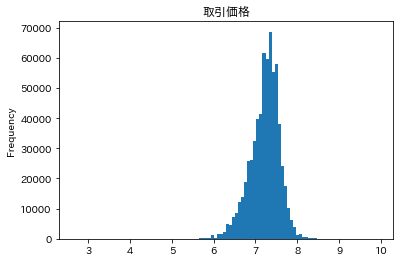

In [6]:
y.plot.hist(title="取引価格", bins=100)

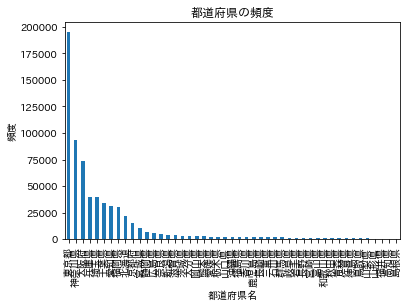

In [8]:
import matplotlib.pyplot as plt
count = df["都道府県名"].value_counts()
count.plot.bar(title="都道府県の頻度")
plt.xlabel("都道府県名")
plt.ylabel("頻度")
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651975 entries, 1117225 to 47008266
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   都道府県名         651975 non-null  category
 1   市区町村名         651975 non-null  category
 2   地区名           651318 non-null  category
 3   最寄駅：名称        649342 non-null  category
 4   最寄駅：距離（分）     628916 non-null  float64 
 5   間取り           629546 non-null  category
 6   面積（㎡）         651975 non-null  float64 
 7   建築年           633280 non-null  float64 
 8   建物の構造         637098 non-null  category
 9   用途            601333 non-null  category
 10  今後の利用目的       288948 non-null  category
 11  都市計画          633162 non-null  category
 12  建ぺい率（％）       629168 non-null  float64 
 13  容積率（％）        629168 non-null  float64 
 14  取引時点          651975 non-null  float64 
 15  改装            593301 non-null  category
 16  取引の事情等        18397 non-null   category
 17  取引価格（総額）_log  651975 

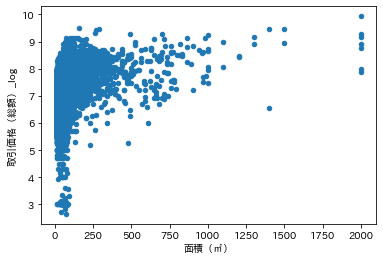

In [10]:
# 仮説
# 面積が大きい方が金額が高い

df.plot.scatter(x='面積（㎡）', y='取引価格（総額）_log')
plt.show()

In [22]:
df_t = df.loc[(df["都道府県名"] != "東京都") & (df["都道府県名"] != "大阪府")]

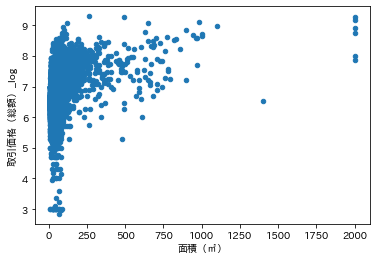

In [23]:
df_t.plot.scatter(x='面積（㎡）', y='取引価格（総額）_log')
plt.show()

In [29]:
df_t.loc[(df_t["面積（㎡）"] < 250) & (df_t["取引価格（総額）_log"] > 5)]

,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,用途,...,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log,緯度,経度,クラスタ平均
ID,,,,,,,,,,,,,,,,,,,,,
1117225,北海道,苫小牧市,新中野町,苫小牧,25.0,３ＬＤＫ,120.0,12.0,ＲＣ,住宅,...,準工業地域,60.0,200.0,2018.75,未改装,NaN,7.431364,42.631246,141.603122,2.0
1114724,北海道,苫小牧市,青葉町,青葉,9.0,３ＬＤＫ,70.0,35.0,ＲＣ,住宅,...,第１種中高層住居専用地域,60.0,200.0,2017.75,未改装,NaN,6.342423,42.631246,141.603122,2.0
1114753,北海道,苫小牧市,青葉町,青葉,3.0,３ＬＤＫ,70.0,31.0,ＲＣ,住宅,...,第１種中高層住居専用地域,60.0,200.0,2016.50,改装済,NaN,6.778151,42.631246,141.603122,2.0
1120806,北海道,苫小牧市,表町,苫小牧,8.0,４ＬＤＫ,105.0,18.0,ＲＣ,住宅,...,商業地域,80.0,400.0,2011.99,未改装,NaN,7.230449,42.631246,141.603122,2.0
1117264,北海道,苫小牧市,新中野町,苫小牧,25.0,３ＬＤＫ,90.0,15.0,ＲＣ,住宅,...,準工業地域,60.0,200.0,2015.50,未改装,NaN,7.204120,42.631246,141.603122,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47008534,沖縄県,うるま市,字宮里,NaN,NaN,４ＬＤＫ,65.0,10.0,ＳＲＣ,住宅,...,第１種中高層住居専用地域,60.0,200.0,2019.75,未改装,NaN,7.342423,26.378685,127.857493,3.0
47007866,沖縄県,うるま市,字江洲,NaN,NaN,３ＬＤＫ,70.0,6.0,ＲＣ,住宅,...,準住居地域,60.0,200.0,2018.99,改装済,NaN,7.447158,26.378685,127.857493,3.0
47029524,沖縄県,うるま市,字塩屋,NaN,NaN,３ＬＤＫ,75.0,22.0,ＲＣ,住宅,...,市街化区域及び市街化調整区域外の都市計画区域,60.0,100.0,2009.99,未改装,NaN,7.000000,26.378685,127.857493,3.0


In [30]:
df.shape

(651975, 21)

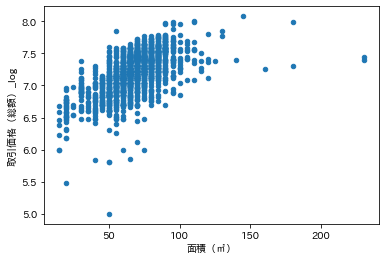

In [35]:
df_tokyo = df[df["都道府県名"] == "沖縄県"]
df_tokyo.plot.scatter(x='面積（㎡）', y='取引価格（総額）_log')
plt.show()

In [36]:
pref_list = df["都道府県名"].tolist()
pref_list = set(pref_list)

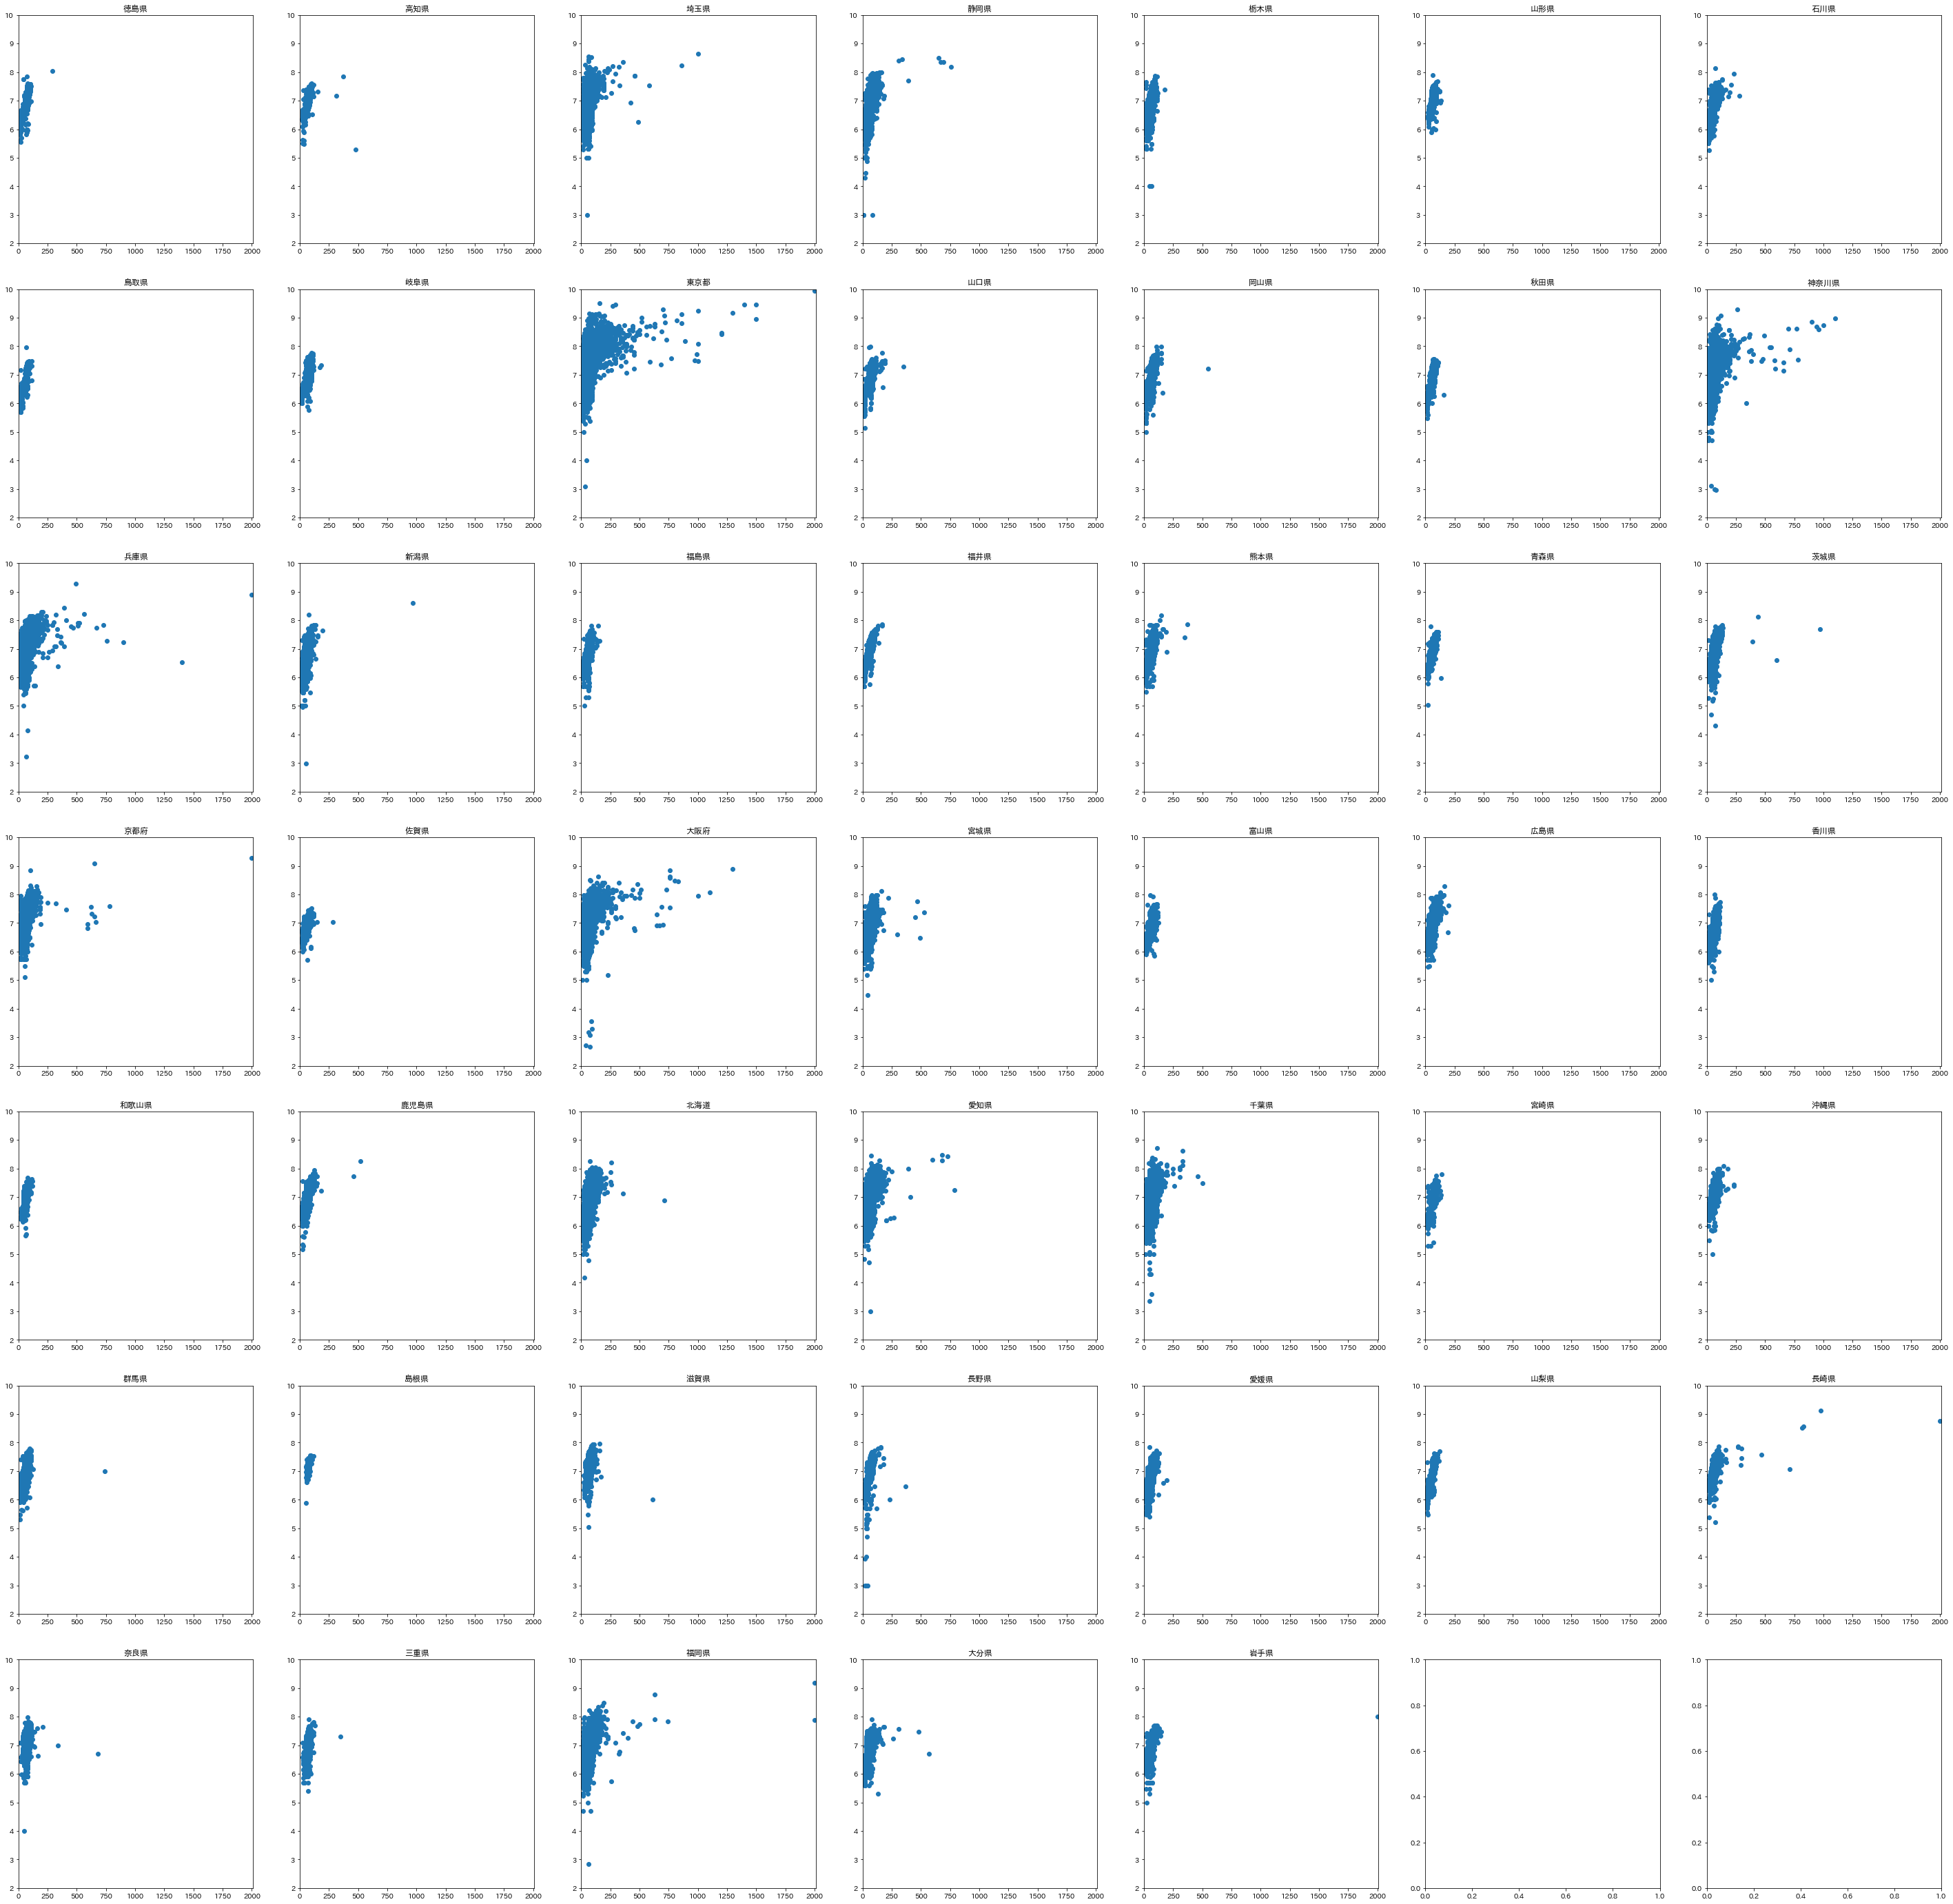

In [40]:
fig1, ax1 = plt.subplots(7, 7, figsize=(50, 50))
j = 0
for i, pref in enumerate(pref_list):
    if j == 7:
        j = 0
    ax = i // 7
    ax1[ax][j].set_title(pref)
    ax1[ax][j].scatter(df[df["都道府県名"]==pref]["面積（㎡）"], df[df["都道府県名"]==pref]["取引価格（総額）_log"])
    ax1[ax][j].set_xlim(0, 2010)
    ax1[ax][j].set_ylim(2, 10)
    
    j = j + 1
plt.show()
fig1.savefig("pref_station_distance.png")
    